In [14]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import helpfunction as helper

In [15]:
%matplotlib inline

In [16]:
inputdir = './input/ACPTMay/run1_v12_new/' 

In [17]:
dict_names = ['nue','nu','on','off']

# Sandbox

In [18]:
file = uproot.open('./input/v15/run1/flashID_tree.root')

In [19]:
file.keys()

[b'nuCCAnalyser;1',
 b'pandoraSliceId;1',
 b'shrreco3d;1',
 b'FRH;1',
 b'FRV;1',
 b'rICKR;1',
 b'rICKI;1',
 b'PreC;1',
 b'PostC;1',
 b'PostO;1',
 b'PreD;1',
 b'PostDO;1',
 b'ER;1']

# Check Flash PE for different runs

In [5]:
flash_ext_run1 = uproot.open('./input/ImprovedMay/run1/NueCC_off.root')['pandoraSliceId/flashes']
flash_ext_run3 = uproot.open('./input/ImprovedMay/run3/NueCC_off_run3.root')['pandoraSliceId/flashes']
mask_run1 = flash_ext_run1.array('isBeamFlash')
mask_run3 = flash_ext_run3.array('isBeamFlash')
scale = 5579116/37207065 #off triggers

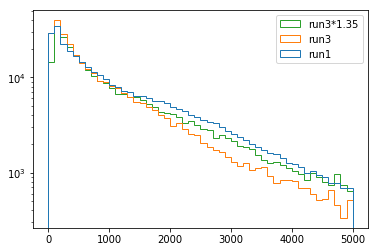

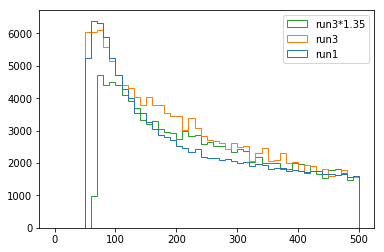

In [6]:
weigths = [[1]*sum(mask_run1), [1/scale]*sum(mask_run3), [1/scale]*sum(mask_run3)]
# Beam flashes
plt.hist([flash_ext_run1.array('totalPE')[mask_run1], flash_ext_run3.array('totalPE')[mask_run3], 
          flash_ext_run3.array('totalPE')[mask_run3]*1.35], histtype='step', weights=weigths, range=(0,5000), bins=50, label=('run1', 'run3', 'run3*1.35'))
plt.yscale('log')
plt.legend()
plt.savefig('f3.pdf')
plt.show()

plt.hist([flash_ext_run1.array('totalPE')[mask_run1], flash_ext_run3.array('totalPE')[mask_run3], 
          flash_ext_run3.array('totalPE')[mask_run3]*1.35], histtype='step', weights=weigths, range=(0,500), bins=50, label=('run1', 'run3', 'run3*1.35'))
plt.legend()
plt.savefig('f4.pdf')

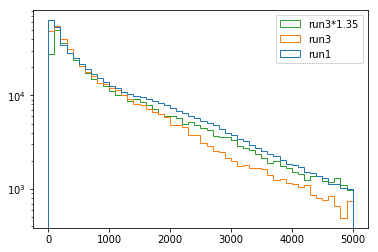

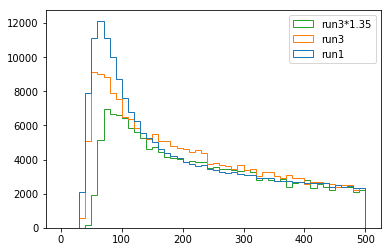

In [8]:
weigths = [[1]*len(mask_run1), [1/scale]*len(mask_run3), [1/scale]*len(mask_run3)]
# All flashes
plt.hist([flash_ext_run1.array('totalPE'), flash_ext_run3.array('totalPE'), flash_ext_run3.array('totalPE')*1.35], histtype='step', weights=weigths, range=(0,5000), bins=50, label=('run1', 'run3', 'run3*1.35'))
plt.yscale('log')
plt.legend()
plt.savefig('f3.pdf')
plt.show()
plt.hist([flash_ext_run1.array('totalPE'), flash_ext_run3.array('totalPE'), flash_ext_run3.array('totalPE')*1.35], histtype='step', weights=weigths, range=(0,500), bins=50, label=('run1', 'run3', 'run3*1.35'))
plt.legend()
plt.savefig('f4.pdf')

# CRT

In [38]:
file_dict = {}

flist =  os.listdir(inputdir)
for sample in dict_names:
    file_name = next((s for s in flist if "NuCC_"+sample+'_' in s), None)
    file_dict[sample] = {}
    file_dict[sample]["all_events"] = uproot.open(inputdir+file_name)['pandoraSliceId/events']
    file_dict[sample]["slices"] = uproot.open(inputdir+file_name)['pandoraSliceId/slices']
    file_dict[sample]["flashes"] = uproot.open(inputdir+file_name)['pandoraSliceId/flashes']
    file_dict[sample]["events"] = uproot.open(inputdir+file_name)['nuCCAnalyser/Event']
    
    print(sample+":\tAll events: ", file_dict[sample]["all_events"].numentries, end="")
    print("\tSelected events: ", file_dict[sample]["events"].numentries, end="")
    print("\tPassing fraction: {0:0.0f}%".format(file_dict[sample]["events"].numentries/file_dict[sample]["all_events"].numentries*100), end="\n")

nue:	All events:  79653	Selected events:  65702	Passing fraction: 82%
nu:	All events:  70725	Selected events:  32177	Passing fraction: 45%
on:	All events:  178888	Selected events:  47726	Passing fraction: 27%
off:	All events:  234256	Selected events:  42961	Passing fraction: 18%


In [18]:
file_dict["nue"]["slices"].keys()

[b'sliceId',
 b'run',
 b'subRun',
 b'event',
 b'evt_time_sec',
 b'evt_time_nsec',
 b'hasDeposition',
 b'totalCharge',
 b'centerX',
 b'centerY',
 b'centerZ',
 b'minCRTdist',
 b'CRTtime',
 b'CRTplane',
 b'CRTtracklength',
 b'CRTnumtracks',
 b'deltaY',
 b'deltaZ',
 b'deltaYSigma',
 b'deltaZSigma',
 b'chargeToLightRatio',
 b'xclVariable',
 b'passesPreCuts',
 b'flashMatchScore',
 b'totalPEHypothesis',
 b'peHypothesisSpectrum',
 b'isTaggedAsTarget',
 b'targetMethod',
 b'isConsideredByFlashId',
 b'topologicalScore',
 b'hasBestTopologicalScore',
 b'hasBestFlashMatchScore',
 b'nHits',
 b'ACPTdt',
 b'flashZCenter',
 b'flashTime',
 b'z_center',
 b'y_up',
 b'y_dn',
 b'x_up',
 b'x_dn',
 b'z_up',
 b'z_dn',
 b'flash_timeanode_u',
 b'flash_timeanode_d',
 b'flash_timecathode_u',
 b'flash_timecathode_d',
 b'purity',
 b'completeness',
 b'isMostComplete',
 b'nuInteractionType',
 b'nuCCNC',
 b'nuEnergy',
 b'leptonEnergy',
 b'nuInteractionTime',
 b'nuPdgCode',
 b'nuVertexX',
 b'nuVertexY',
 b'nuVertexZ']

nue	Passed slices: 0.0%, Selected slices: 0.0%
nu	Passed slices: 0.0%, Selected slices: 0.0%
on	Passed slices: 0.0%, Selected slices: 0.0%
off	Passed slices: 0.0%, Selected slices: 0.0%


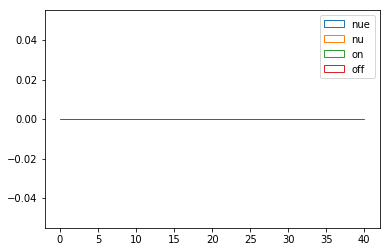

In [19]:
for sample in dict_names:
    num = file_dict[sample]["slices"].numentries
    plt.hist(file_dict[sample]["slices"].array('minCRTdist'),histtype='step', range=(0,40), weights=[1/num]*num, label=sample, bins=20)
    mask_pass = file_dict[sample]["slices"].array('passesPreCuts')
    mask_select = file_dict[sample]["slices"].array('isTaggedAsTarget')
    crt_tagged = file_dict[sample]["slices"].array('minCRTdist')<50
    print(sample+'\tPassed slices: {0:0.1f}%, Selected slices: {1:0.1f}%'.format(sum(crt_tagged & mask_pass)/sum(mask_pass)*100, sum(crt_tagged & mask_select)/sum(mask_select)*100 ))
    
plt.legend()

In [20]:
slice_cols = ['purity', 'minCRTdist', 'CRTplane', 'nuVertexX', 'nuVertexY', 'nuVertexZ', 'leptonEnergy', 'isTaggedAsTarget', 'CRTtime']
fidvol_arr = [10,10,10,10,10,50] 
kin_min=0.02

In [21]:
#for nue sample now:
# First, construct signal frame!
df_nue_slices_sig = file_dict['nue']['slices'].pandas.df(slice_cols)
df_nue_slices_sig = df_nue_slices_sig[helper.inTPC_df( df_nue_slices_sig[[ 'nuVertexX', 'nuVertexY', 'nuVertexZ']], 'nuVertexX', 'nuVertexY', 'nuVertexZ', fidvol=fidvol_arr)]
df_nue_slices_sig = df_nue_slices_sig.query('leptonEnergy>@kin_min') #  & nuEnergy<0.6')
df_nue_slices_sig_pure = df_nue_slices_sig.query('purity>0.7 & isTaggedAsTarget')
crt_dist = df_nue_slices_sig_pure['minCRTdist']
crt_time = df_nue_slices_sig_pure['CRTtime']
crt_plane = df_nue_slices_sig_pure['CRTplane']

crt_dist_off = file_dict['off']["slices"].array('minCRTdist')
crt_time_off = file_dict['off']["slices"].array('CRTtime')
crt_plane_off = file_dict['off']["slices"].array('CRTplane')

In [22]:
print(sum(crt_dist<50)/len(crt_dist))
print(sum(crt_dist_off<50)/len(crt_dist_off))

0.0
0.0


/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


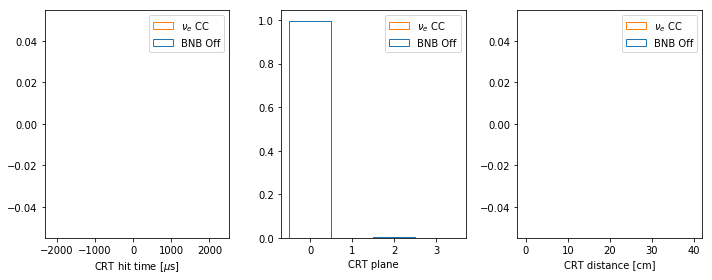

In [23]:
fig, ax = plt.subplots(ncols = 3, sharex=False, sharey = False, figsize=(10,4))

ax[0].hist([crt_time_off, crt_time], range = (-2.1e3,2.3e3), bins=50, histtype='step', density=1, label=['BNB Off', r'$\nu_e$ CC'])
ax[0].set_xlabel(r'CRT hit time [$\mu$s]')
ax[0].legend()

ax[1].hist([crt_plane_off, crt_plane], range = (-0.5,3.5), bins=4, histtype='step', density=1, label=['BNB Off', r'$\nu_e$ CC'])
ax[1].set_xlabel(r'CRT plane')
ax[1].set_xticks(range(4))
ax[1].legend()


ax[2].hist([crt_dist_off, crt_dist], range = (0,40), bins=50, histtype='step', density=1, label=['BNB Off', r'$\nu_e$ CC'])
ax[2].set_xlabel(r'CRT distance [cm]')
ax[2].legend()

fig.tight_layout()
fig.savefig('CRT1.pdf')

/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


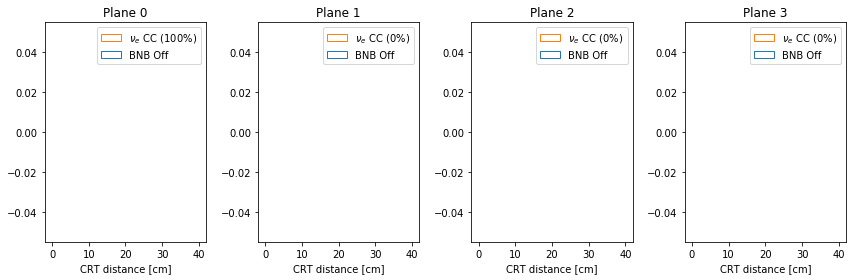

In [24]:
fig, ax = plt.subplots(ncols = 4, sharex=False, sharey = False, figsize=(12,4))

for i in range(4):
    per = sum(crt_plane==i)/sum(crt_plane<5)*100
    ax[i].hist([crt_dist_off[crt_plane_off==i], crt_dist[crt_plane==i]], range = (0,40), bins=50, histtype='step', density=1, label=['BNB Off', r'$\nu_e$ CC ({0:0.0f}%)'.format(per)])
    ax[i].set_xlabel(r'CRT distance [cm]')
    ax[i].legend()
    ax[i].set_title('Plane '+str(i))
    
fig.tight_layout()
fig.savefig('CRT2.pdf')

## Look at chi2

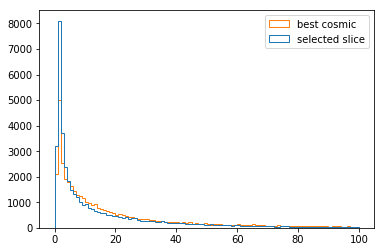

In [39]:
# lowest cosmic chi2 in event:
chi_cosmic_off = file_dict['off']["all_events"].array('bestCosmicMatch')[file_dict['off']["all_events"].array('foundATargetSlice')]
chi_slice_off = file_dict['off']["slices"].array('flashMatchScore')[file_dict['off']["slices"].array('isTaggedAsTarget')]
plt.hist([chi_slice_off, chi_cosmic_off], histtype='step', range=(0,100), bins=100, label=['selected slice', 'best cosmic'])
plt.legend()

65702


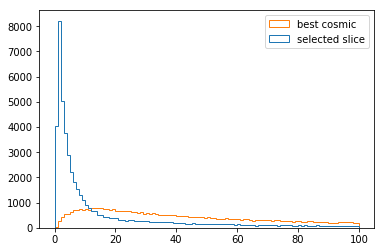

In [40]:
# lowest cosmic chi2 in event:
mask_pure = file_dict['nue']["slices"].array('purity')>0.7
mask_selected = file_dict['nue']["slices"].array('isTaggedAsTarget')
mask_selected_event = file_dict['nue']["all_events"].array('foundATargetSlice')
print(sum(mask_selected))
mask_pureplus = mask_pure & mask_selected
chi_cosmic_nue = file_dict['nue']["all_events"].array('bestCosmicMatch')[mask_selected_event][mask_pure[mask_selected]]
chi_slice_nue = file_dict['nue']["slices"].array('flashMatchScore')[mask_pureplus]
plt.hist([chi_slice_nue, chi_cosmic_nue], histtype='step', range=(0,100), bins=100, label=['selected slice', 'best cosmic'])
plt.legend()

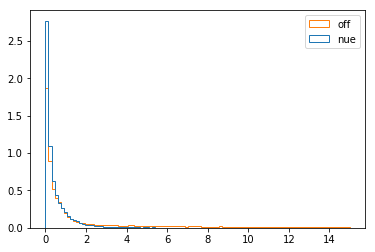

In [41]:
plt.hist([chi_slice_nue/chi_cosmic_nue, chi_slice_off/chi_cosmic_off], label=['nue', 'off'], histtype='step', bins=100, range=(0,15), density=True)
plt.legend()

In [42]:
nue_pass = []
off_pass = []

for cut in np.arange(0,10,0.1):
    a = sum((chi_slice_nue/chi_cosmic_nue)>cut)/len(chi_slice_nue)
    b = sum((chi_slice_off/chi_cosmic_off)>cut)/len(chi_slice_off)
    nue_pass.append(a)
    off_pass.append(b)
    if(cut%1==0):
        print("{0:0.1f}\toff: {1:0.0f}%\tnue: {2:0.1f}%".format(cut,b*100,a*100))

0.0	off: 100%	nue: 99.7%
1.0	off: 38%	nue: 14.8%
2.0	off: 29%	nue: 5.0%
3.0	off: 25%	nue: 2.5%
4.0	off: 22%	nue: 1.4%
5.0	off: 19%	nue: 0.8%
6.0	off: 17%	nue: 0.5%
7.0	off: 15%	nue: 0.3%
8.0	off: 13%	nue: 0.2%
9.0	off: 12%	nue: 0.2%


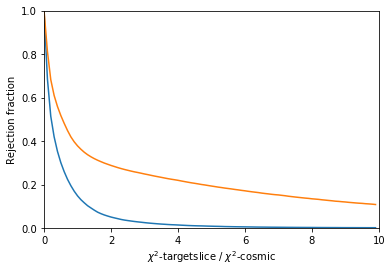

In [43]:
plt.plot(np.arange(0,10,0.1), nue_pass,  label="nue")
plt.plot(np.arange(0,10,0.1), off_pass,  label="off")
plt.ylim(0,1)
plt.xlim(0,10)
plt.xlabel( r'$\chi^2$-targetslice / $\chi^2$-cosmic')
plt.ylabel('Rejection fraction')
plt.savefig('ratiochi2.pdf')